# K-means

The KMeans algorithm clusters data by trying to separate samples in k groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The objective of K-means is to minimize the average squared Euclidean distance of documents from their cluster centers, where cluster centers are:

$$
\vec{\mu}(\omega) = \frac{1}{\mid \omega \mid}\sum\limits_{\vec{x} \in \omega} \vec{x}
$$

and the **residual sum of squares** is:

$$
RSS = \sum\limits_{k=1}^{K}\sum\limits_{\vec{x}\in \omega_k} \mid \vec{x} - \vec{\mu}(\omega_k) \mid^2
$$

Main steps:
- Randomly (or with other criteria) choose K objects as centers (called **seeds**)
- Each seed represent a cluster
- **Assign** documents to the cluster $\omega_i$ with the closest centroid $\vec{\mu}(\omega_i)$
- **Refine** centroids on the bases of the current objects in the clusters
- Repeat assignement and refinement until termination

Termination options:
- Fixed number of iterations
- Assignment does not change clusters (the centroids do not change)
- RSS falls below a threshold

## Init the MEC environment

In [3]:
from IPython.core.display import display, HTML
import nbimporter
from mecdb import MEC
import sklearn.cluster as cls
import numpy as np


def show(doc, w=120):
    style = 'width: ' + str(w) + 'px;'
    try:
        url = doc['image']
    except KeyError:
        url = 'https://cdn0.iconfinder.com/data/icons/large-glossy-icons/512/No.png'
    display(HTML('<img src="' + url + '" style="' + style + '">'))

    
def show_grid(docs, w=120, row=6):
    style = 'width: ' + str(w) + 'px; display: inline;'
    html_row = []
    for doc in docs:
        try:
            url = doc['image']
        except KeyError:
            url = 'https://cdn0.iconfinder.com/data/icons/large-glossy-icons/512/No.png'
        html_row.append('<img src="' + url + '" style="' + style + '">')
        if len(html_row) == row:
            display(HTML("".join(html_row)))
            html_row = []
    display(HTML("".join(html_row)))
    

dataset = 'calzedoniajson_items_0'
mec = MEC(dataset)


In [4]:
M = mec.dataset_matrix(size=len(mec.dictionary))

# Python sklearn implementation

In [5]:
kmeans = cls.KMeans(n_clusters=2).fit(M)

In [6]:
print kmeans.labels_

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


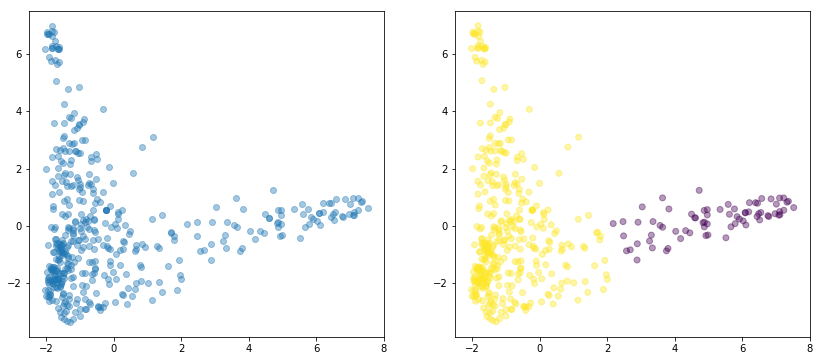

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
mec.visualize(M, axes[0])
mec.visualize(M, axes[1], labels=kmeans.labels_)
plt.show()



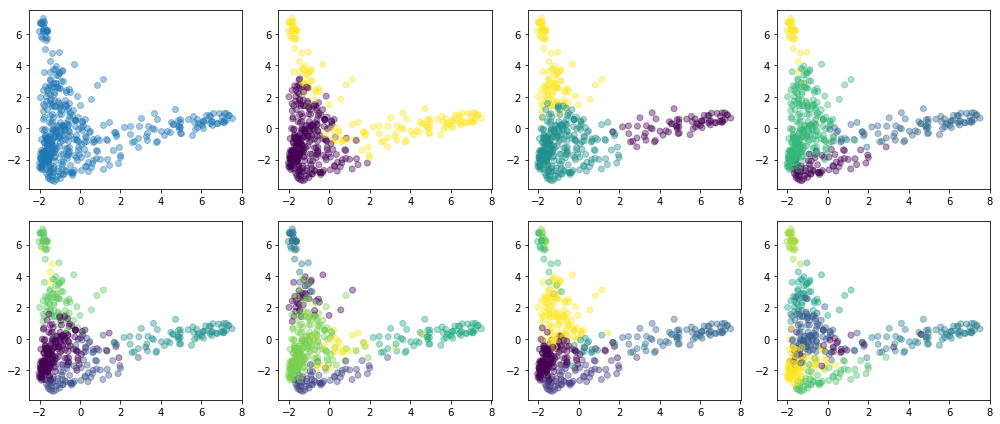

In [8]:
keys = range(2, 9)
clustering = [cls.KMeans(n_clusters=k).fit(M).labels_ for k in keys]
cols = 4
rows = int(np.ceil(float(len(clustering)+1)/cols))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 6))
mec.visualize(M, axes[0,0])
for i in range(1, len(keys)+1):
    mec.visualize(M, axes[i/cols,i%cols], labels=clustering[i-1])
plt.tight_layout()
plt.show()



### Cluster preview

In [9]:
docs_per_cluster, k = 20, 4
clusters = cls.KMeans(n_clusters=k).fit(M).labels_
partition = dict((x, []) for x in range(0, k))
for i, l in enumerate(clusters):
    partition[l].append(mec.docs[i])
for cluster, resources in partition.items():
    display(HTML('<h2>Cluster '+str(cluster)+'</h2>'))
    show_grid(resources[:docs_per_cluster], row=3)

### Clustering tags
We can apply clustering to tags by simply fit the clustering algorithm with the transposed matrix.

In [10]:
tags_per_cluster, k = 20, 12
clusters = cls.KMeans(n_clusters=k).fit(M.T).labels_
partition = dict((x, []) for x in range(0, k))
tags = sorted(mec.dictionary.keys())
for i, l in enumerate(clusters):
    partition[l].append(tags[i])
for cluster, tags in partition.items():
    display(HTML('<h2>Cluster '+str(cluster)+'</h2>'))
    print ", ".join(tags[:tags_per_cluster])


band, city, competition, concert, crowd, dancer, dancing, exhibition, festival, group, landscape, light, many, music, musician, performance, religion, show, stage, tourism


Christmas, Halloween, Luna, New Year, Pilate, World Wide Web, accident, accomplishment, acoustic, acrobat, administration, adolescent, advice, agility, aid, analogue, anatomy, anniversary, aquarium, aquatic


active, aerobics, athlete, balance, body, bodybuilding, brawny, exercise, fitness, gymnastics, health, slender, sport, strength, weight, yoga


adult, attractive, beautiful, cute, dress, elegant, fashion, girl, glamour, hair, long, model, one, people, portrait, pretty, sexy, style, wear, woman


beach, bikini, enjoyment, fair weather, fun, leisure, nature, ocean, recreation, relaxation, sand, sea, seashore, sky, summer, sun, sunglasses, swimming, swimsuit, tan


action, airplane, car, drive, fossil fuel, fuel, gasoline, industry, military, plastic, police, road, safety, seat, street, transportation system, vehicle


brassiere, erotic, figure, lingerie, pantie, seduction, skin, thin, underwear


announcement, arrival, banner, birth, birthday, card, celebration, greeting, invitation, label, love, scrapbook, shower, special, template, vector, welcome


abstract, alphabet, art, business, cloud, composition, conceptual, creativity, definition, design, desktop, education, graphic, illustration, internet, isolated, leadership, letter, management, no person


accessory, bright, color, cotton, fabric, needlework, pastime, pattern, sale, scarf, sewing, shopping, textile, thread, warmly, wool


foot, footwear, shoe, sneakers


actor, actress, award, ceremony, editorial, entertainment, event, fame, famous, movie, party, person, pop, promotion, red carpet, talent


## Evaluation of assignment quality
Given a resource, either a document or a tag, we can measure the quality of its assignment to the cluster as the distance between the resource vector and the cluster centroid.

In [11]:
kmeans = cls.KMeans(n_clusters=k).fit(M.T)
clusters = kmeans.labels_
partition = dict((x, []) for x in range(0, k))
tags = sorted(mec.dictionary.keys())
for i, l in enumerate(clusters):
    partition[l].append(tags[i])

Access to centroid of clusters:

In [12]:
print kmeans.cluster_centers_
print kmeans.inertia_

[[  0.00000000e+00   2.02432160e+00   6.93889390e-18 ...,  -1.38777878e-17
    0.00000000e+00   0.00000000e+00]
 [ -2.77555756e-17  -2.77555756e-17   2.08166817e-17 ...,  -2.08166817e-17
    8.25983925e-02   1.28592347e+00]
 [  6.09682438e-02  -2.77555756e-17   1.38777878e-17 ...,  -2.08166817e-17
    2.77555756e-17  -4.16333634e-17]
 ..., 
 [  0.00000000e+00   6.85586597e-01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.85117153e-01   1.49420709e-01   5.97274371e-01 ...,   6.12110283e-01
    2.81128692e-01   5.47495431e-02]
 [  0.00000000e+00  -1.38777878e-17  -6.93889390e-18 ...,  -2.08166817e-17
    1.38777878e-17   1.95878782e-01]]
44020.0349208


In [13]:
for k_e in range(2, 20):
    kmeans_e = cls.KMeans(n_clusters=k_e).fit(M.T)
    print k_e, kmeans_e.inertia_

2 52653.9839198
3 50471.0608309
4 49083.4064365
5 48171.7247375
6 47349.9780884
7 46844.4423856
8 46202.3935795
9 45709.6108936
10 45167.6997338
11 44594.4614605
12 44078.547771
13 43651.441063
14 43388.5931078
15 43153.221843
16 42571.8821063
17 42326.8275453
18 41759.0983852
19 41309.209757


In [14]:
from scipy.spatial import distance as ds

def tag_distance(cluster, partition, kmeans, tags, matrix):
    tag_distances = []
    for tag in partition[cluster]:
        center = kmeans.cluster_centers_[cluster]
        v = matrix.T[tags.index(tag)]
        distance = ds.euclidean(center, v)
        tag_distances.append((tag, distance))
    return sorted(tag_distances, key=lambda x: x[1])

for cluster in range(0, k):
    print tag_distance(cluster, partition, kmeans, tags, M)[:3]

[(u'box', 7.364105667743401), (u'gift', 7.6726048829385185), (u'Christmas', 7.967561424723426)]
[(u'success', 7.445945204769146), (u'management', 7.453430292901516), (u'leadership', 7.457110654564307)]
[(u'water', 7.546303683642153), (u'vacation', 8.007076294250595), (u'beach', 8.535499257056705)]
[(u'thin', 8.848651386906388), (u'seduction', 9.174814798459819), (u'erotic', 9.510939193542269)]
[(u'content', 4.085725037167871), (u'ceremony', 4.276424232847757), (u'information', 4.488208619874545)]
[(u'strength', 7.549208525040878), (u'gymnastics', 8.18404872801553), (u'active', 8.556943510850775)]
[(u'stud', 5.4432738546713075), (u'glazed', 5.49981906948313), (u'lock', 5.514149462934731)]
[(u'flower arrangement', 3.8082500524091802), (u'patio', 3.8246951768744903), (u'vase', 3.8746205672923653)]
[(u'traffic', 5.252516224296307), (u'truck', 5.489014870473252), (u'bus', 5.62035592150812)]
[(u'shoe', 5.651159381221796), (u'foot', 6.670608895466684), (u'footwear', 7.839934593841605)]
[(u'fa

## Overview of cluster homogeneity
The distribution of distances from resources to cluster centroids provides a way to look at the homogeneity of the cluster.

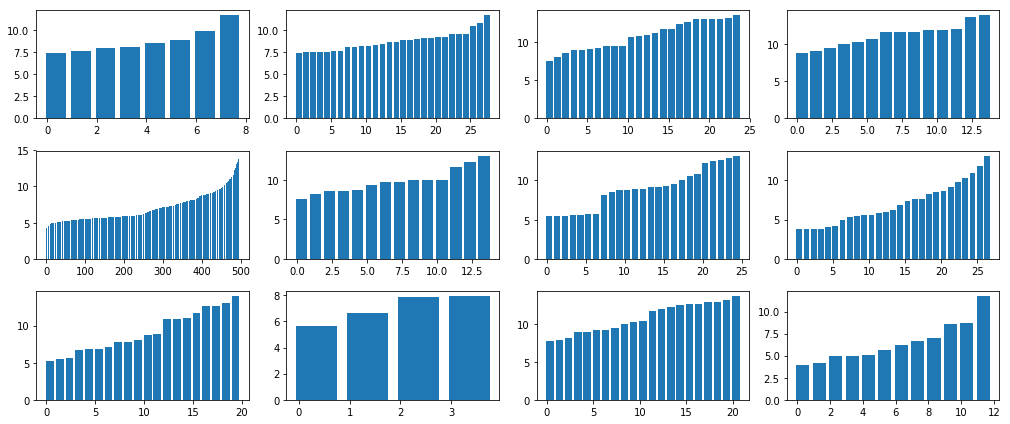

In [15]:
distances = []
for cluster in range(0, k):
    distances.append([x[1] for x in tag_distance(cluster, partition, kmeans, tags, M)])

width = 0.35 
cols = 4
fig, axes = plt.subplots(nrows=int(np.ceil(float(k)/cols)), ncols=cols, figsize=(14, 6))
for cl in range(0, k):
    axes[cl/cols, cl%cols].bar(np.arange(len(distances[cl]))+width, distances[cl])
plt.tight_layout()
plt.show()

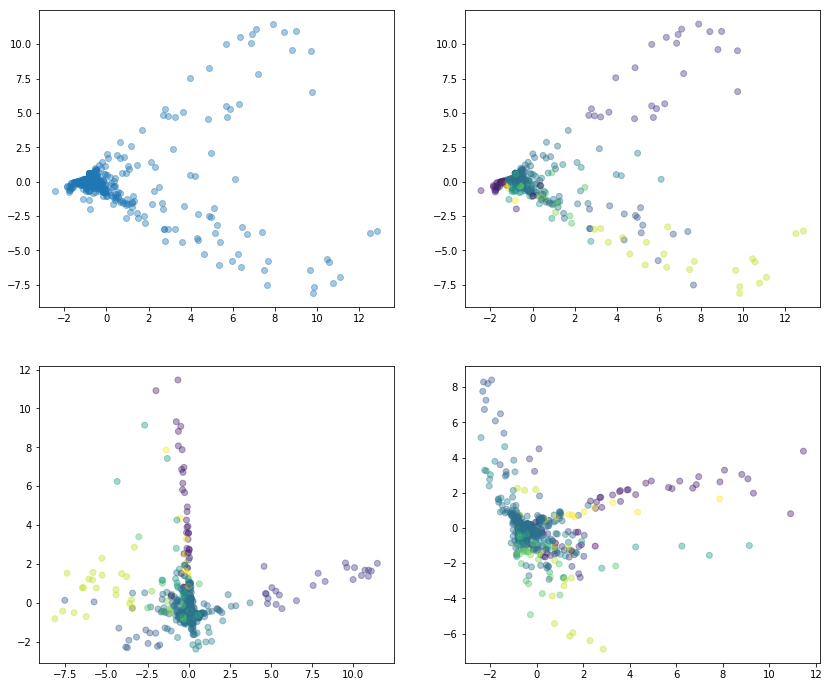

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
mec.visualize(M.T, axes[0,0])
mec.visualize(M.T, axes[0,1], labels=kmeans.labels_)
mec.visualize(M.T, axes[1,0], labels=kmeans.labels_, p1=1, p2=2)
mec.visualize(M.T, axes[1,1], labels=kmeans.labels_, p1=2, p2=3)
plt.show()



## Simplify terminology
In order to simplify the terminology, we can create clusters of tags within a cluster.

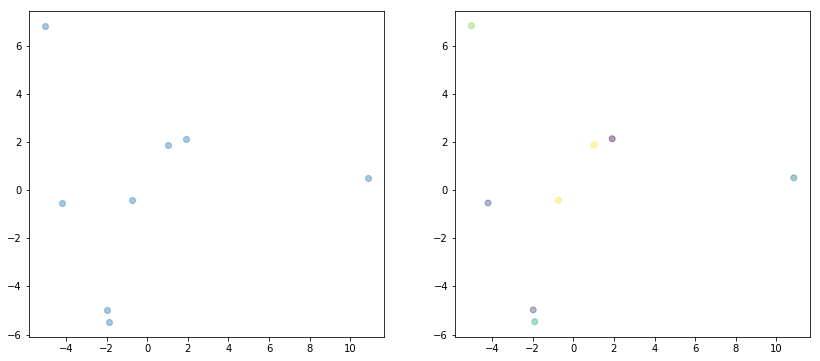

In [17]:
tags = sorted(mec.dictionary.keys())

cluster = 0
cl_k = 6

cluster_labels = []
for tag in partition[cluster]:
    v = M.T[tags.index(tag)]
    cluster_labels.append((tag, v))
T = np.array([x[1] for x in cluster_labels])
cluster_means = cls.KMeans(n_clusters=cl_k).fit(T)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
mec.visualize(T, axes[0])
mec.visualize(T, axes[1], cluster_means.labels_)
plt.show()

In [18]:
print 'Cluster', cluster, 'is described by', len(partition[cluster]), 'labels'
cluster_partition = dict((x, []) for x in range(0, cl_k))
for i, l in enumerate(cluster_means.labels_):
    cluster_partition[l].append(cluster_labels[i][0])
for cl_i, cl_tags in cluster_partition.items():
    display(HTML('<h2>Cluster '+str(cl_i)+'</h2>'))
    print ", ".join(cl_tags)

Cluster 0 is described by 8 labels


card


Christmas, celebration


love


decoration


winter


box, gift
